Aim
Since my first week on this platform, I have been fascinated by the topic of time series analysis. This kernel is prepared to be a container of many broad topics in the field of time series analysis. My motive is to make this the ultimate reference to time series analysis for beginners and experienced people alike.

Some important things
This kernel is a work in progress so every time you see on your home feed and open it, you will surely find fresh content.
I am doing this only after completing various courses in this field. I continue to study more advanced concepts to provide more knowledge and content.
If there is any suggestion or any specific topic  you would like me to cover, kindly mention that in the comments.
If you like my work, be sure to upvote(press the like button) this kernel so it looks more relevant and meaningful to the community.
*side-line,city-station. Basic Concepts and Definitions

Time Series Components: Explain the key components of time series data, such as trend, seasonality, cyclical patterns, and irregular components.

Stationarity: Discuss the importance of stationarity in time series analysis and how to test for it using methods like the Augmented Dickey-Fuller test. 

Autocorrelation and Partial Autocorrelation: Explain these concepts and how they are used in identifying the order of ARIMA models.

Data Preprocessing Handling Missing Data: Techniques for imputing missing values in time series data. Resampling: How to upsample or downsample time series data.Normalization and Scaling: Importance of normalizing or scaling data before applying models.
Exploratory Data Analysis (EDA).*humidity-val or pivot_df_filled(academic data).Visualization Techniques: Use of line plots, seasonal decomposition plots, and autocorrelation plots.
city[] = city.to_series().apply(
    lambda x: (x in ru_holidays) or (x.weekday() >= 5)
)
Statistical Tests: Introduction to tests like the Ljung-Box test for checking autocorrelation ru_holiday = holidays.USA().

In [ ]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
import matplotlib.dates as mdates### matplotlibtwo
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)#
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error#*means
from sklearn.cluster import KMeans#3,42
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates
import datetime as dt
import holidays
import warnings
warnings.filterwarnings('ignore')

# <a id='1'>1. Introduction to date and time</a>

### How to import data?
First, we import all the datasets needed for this kernel. The required time series column is imported as a datetime column using **parse_dates** parameter and is also selected as index of the dataframe using **index_col** parameter. 
#### Data being used:-
1. Google  Stocks Data
2. Humidity in different world cities
3. Microsoft  Stocks Data
3. Pressure in different world cities

In [ ]:
google = pd.read_csv('../input/stock-time-series-20050101-to-20171231/GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
google.head()

In [ ]:
humidity = pd.read_csv('../input/historical-hourly-weather-data/humidity.csv', index_col='datetime', parse_dates=['datetime'])
humidity.tail()

### How to prepare data?
Google stocks data doesn't have any missing values but humidity data does have its fair share of missing values. It is cleaned using **fillna()** method with **ffill** parameter which propagates last valid observation to fill gaps

In [ ]:
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method='ffill')
humidity.head()

*Or you can use pd function merge and create multiindex format datetime,column-city.And also you have two datframes about cities

In [ ]:
new_merge_df = pd.merge(final_city,unique_cities,
                    left_on=['city'],
                    right_on=['city'],
                    how='left')
new_merge_df['datetime'] = pd.to_datetime(new_merge_df['date'])+pd.to_timedelta(new_merge_df['hour'],unit='h')
new_merge_df.set_index(['datetime','city'],inplace=True)

new_pivot_df = new_merge_df.pivot_table(index="datetime",columns='city',values='total_num_humidity',aggfunc='sum')

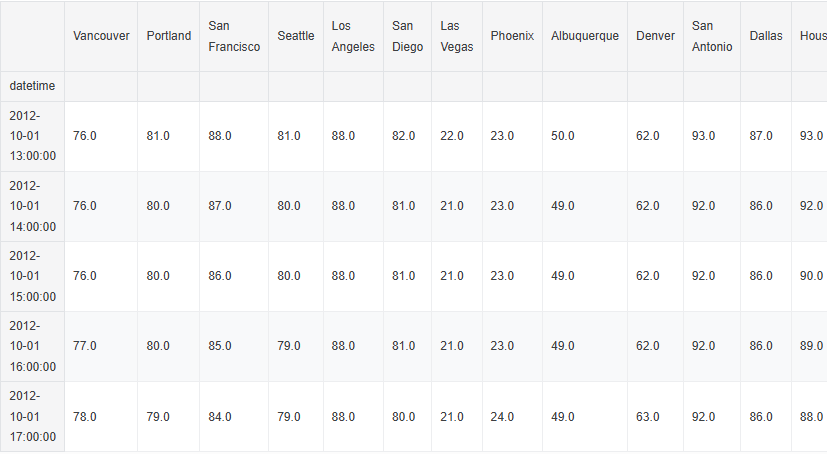

In [ ]:
city_df.fillna(0)

## <a id='1.3'>1.3 Visualizing the datasets</a>

In [ ]:
humidity["Kansas City"].asfreq('M').plot() # asfreq method is used to convert a time series to a specified frequency. Here it is monthly frequency.
plt.title('Humidity in Kansas City over time(Monthly frequency)')
plt.show()

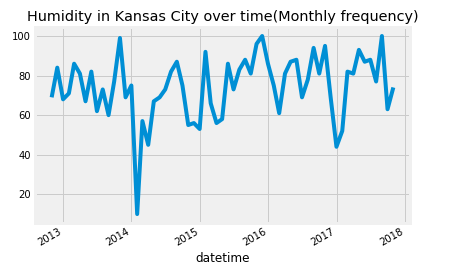

In [ ]:
google['2008':'2010'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2010')
plt.savefig('stocks.png')
plt.show()

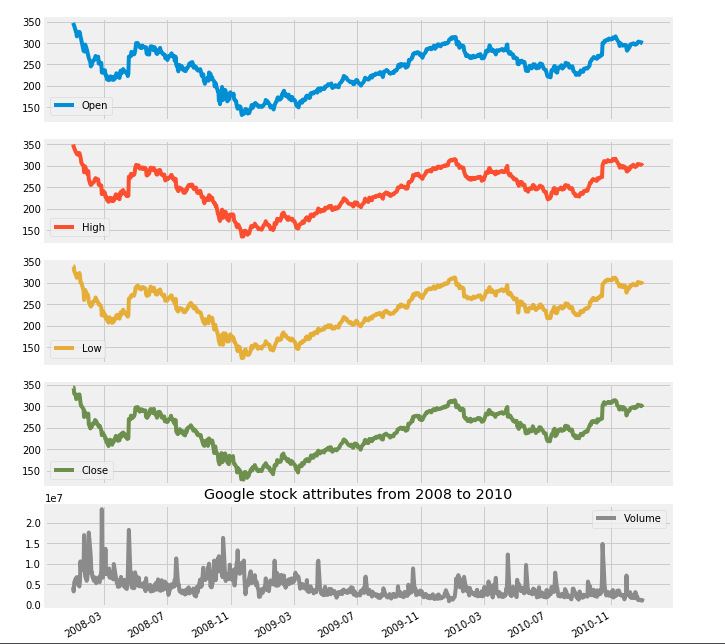

You* can visualize a time period with a limited period for one graph, let's say we want from 2013 to 2018.


In [ ]:
start_date = '2013'   
end_date = '2018' # or formate 2023-01-01 and etc   

filtered_data = city_df.loc[start_date:end_date]
kanzas_city = filtered_data['Kanzas-city']
# plot vizualize
plt.figure(figsize=(16, 12))
plt.plot(kanzas_city)
plt.title('humidity in Kanzas-City')
plt.xlabel('Time')
plt.ylabel('humidity')
plt.grid(True)  
plt.show()

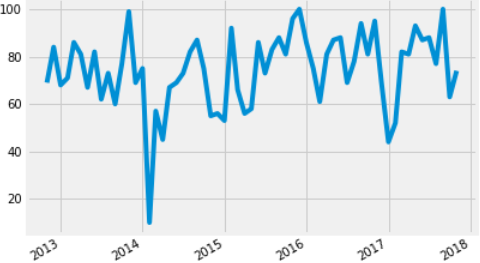

Сan also be divided into intervals to get more accurate readings in a city, such as * Kansas. Set the interval to 4 hours

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
start_date = '2023-03-01'  

filtered_data = city_df.loc[start_date]

kanzas_city = filtered_data['Kanzas-city']# * every city in df(1.5 series analysis)
plt.figure(figsize=(25, 8))
plt.plot(kanzas_city,  linestyle='-', markersize=4)
plt.title('Hour in Kanzas')
plt.xlabel('date and hour')
plt.ylabel('humidity')

# time
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=4))  # mark every 4 hours
plt.xticks(rotation=90)  
#style for grid, you can update everything
plt.grid(which='major', linestyle='--', alpha=0.7)
plt.grid(which='minor', linestyle=':', alpha=0.4)
plt.show()

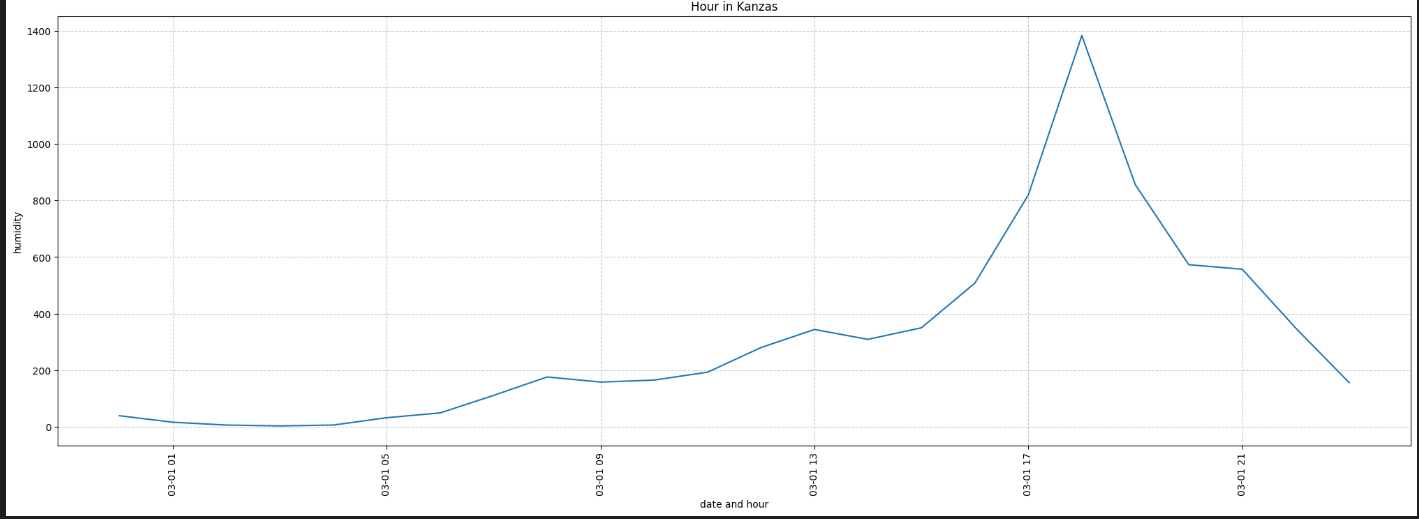

## <a id='1.4'>1.4 Timestamps and Periods</a>

In [ ]:
# Creating a Timestamp
timestamp = pd.Timestamp(2017, 1, 1, 12)
timestamp

In [ ]:
# Creating a period
period = pd.Period('2017-01-01')
period

In [ ]:
# Converting timestamp to period
new_period = timestamp.to_period(freq='H')
new_period

## <a id='1.5'>1.5 Using date_range</a>

What is date_range and how is it useful?
date_range is a method that returns a fixed frequency datetimeindex. It is quite useful when creating your own time series attribute for pre-existing data or arranging the whole data around the time series attribute created by you.

In [ ]:
# Creating a datetimeindex with daily frequency
dr1 = pd.date_range(start='1/1/18', end='1/9/18')
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# Creating a datetimeindex without specifying start date and using periods
dr3 = pd.date_range(end='1/4/2014', periods=8)
dr3

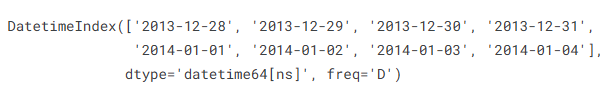

## <a id='1.5'>1.5 Using date_range</a>

What is date_range and how is it useful?
date_range is a method that returns a fixed frequency datetimeindex. It is quite useful when creating your own time series attribute for pre-existing data or arranging the whole data around the time series attribute created by you.

In [ ]:
# Creating a datetimeindex with daily frequency
dr1 = pd.date_range(start='1/1/18', end='1/9/18')
dr1

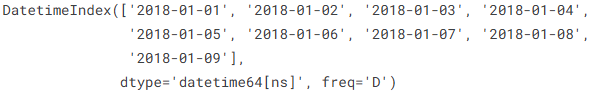

In [ ]:
# Creating a datetimeindex with monthly frequency
dr2 = pd.date_range(start='1/1/18', end='1/1/19', freq='M')
dr2

In [ ]:
# Creating a datetimeindex without specifying start date and using periods
dr3 = pd.date_range(end='1/4/2014', periods=8)
dr3

In [ ]:
# Creating a datetimeindex specifying start date , end date and periods
dr4 = pd.date_range(start='2013-04-24', end='2014-11-27', periods=3)
dr4

## <a id='1.5'>1.6 Using to_datetime</a>

pandas.to_datetime() is used for converting arguments to datetime. Here, a DataFrame is converted to a datetime series.



In [ ]:
df = pd.DataFrame({'year': [2015, 2016], 'month': [2, 3], 'day': [4, 5]})
df

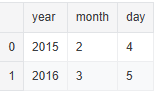

In [ ]:
df = pd.to_datetime(df)
df

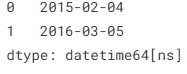

In [ ]:
df = pd.to_datetime('01-01-2017')
df

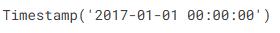

## <a id='1.5'>1.8 Resampling</a>

Upsampling - Time series is resampled from low frequency to high frequency(Monthly to daily frequency). It involves filling or interpolating missing data

Downsampling - Time series is resampled from high frequency to low frequency(Weekly to monthly frequency). It involves aggregation of existing data.

In [ ]:
# Let's use pressure data to demonstrate this
pressure = pd.read_csv('../input/historical-hourly-weather-data/pressure.csv', index_col='datetime', parse_dates=['datetime'])
pressure.tail()

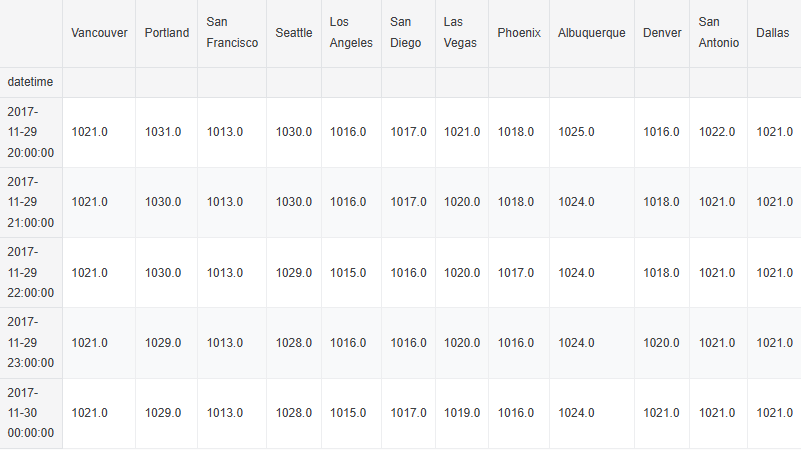

In [ ]:
pressure = pressure.iloc[1:]
pressure = pressure.fillna(method='ffill')
pressure.tail()

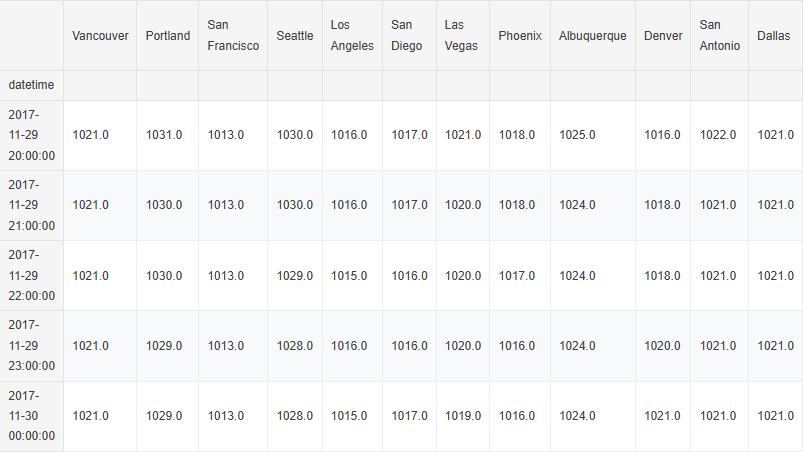

Or you can user bffill

In [ ]:
pressure = pressure.fillna(method='bfill')
pressure.head()

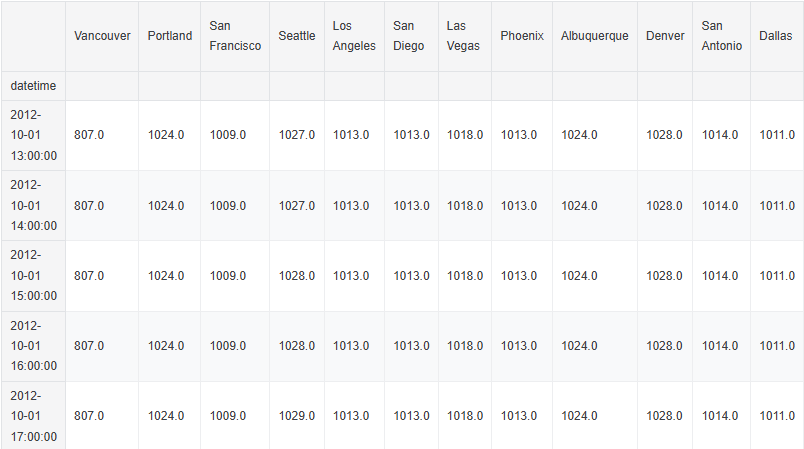

Much less rows are left. Now, we will upsample from 3 day frequency to daily frequency

In [ ]:
pressure = pressure.resample('D').pad()
pressure.head()

*clustering

In [ ]:
# Transpose the data to prepare for scaling
flipped_matrix = city_df.T

# Scale the data for clustering
normalizer = StandardScaler()
normalized_matrix = normalizer.fit_transform(flipped_matrix)

# Apply KMeans clustering with 10 clusters
cluster_engine = KMeans(n_clusters=5, random_state=24)
group_assignment = cluster_engine.fit_predict(normalized_matrix)

# Add cluster labels to the original data
flipped_matrix['Group'] = group_assignment

# Display the cluster labels
print(flipped_matrix[['Group']])

visualisation

In [ ]:

# Evaluate clustering quality using the Silhouette Score
group_score = silhouette_score(normalized_matrix, group_assignment)
print(f"Grouping Quality Score: {group_score}")

# Reduce data dimensionality for visualization using PCA
dimension_reducer = PCA(n_components=2)
reduced_data = dimension_reducer.fit_transform(normalized_matrix)

# Visualize the clusters in 2D space
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=group_assignment, cmap='viridis')
plt.title('Group Patterns in Reduced Dimensions')
plt.xlabel('Reduced Dimension 1')
plt.ylabel('Reduced Dimension 2')
plt.colorbar(label='Group')
plt.show()

or you can have data for every 2 hours instead of 3* days.

In [ ]:
city_df_resampled = city_df.copy()

In [ ]:
city_df_resampled = city_df_resampled.resample('2H').mean()

# <a id='2'>2. Time series decomposition and Random walks</a>

## <a id='2.1'>2.1. Trends, seasonality and noise</a>

These are the components of a time series

Trend - Consistent upwards or downwards slope of a time series
Seasonality - Clear periodic pattern of a time series(like sine funtion)
Noise - Outliers or missing values

In [ ]:
# Let's take Google stocks High for this
google["High"].plot(figsize=(16,8))

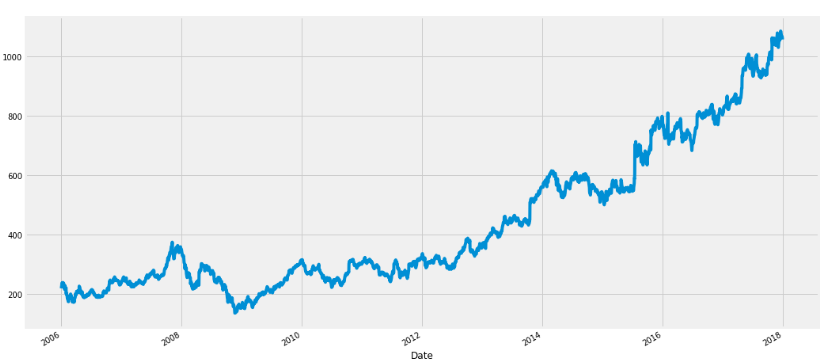

In [ ]:
# Now, for decomposition...
rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(google["High"],freq=360) # The frequncy is annual
figure = decomposed_google_volume.plot()
plt.show()

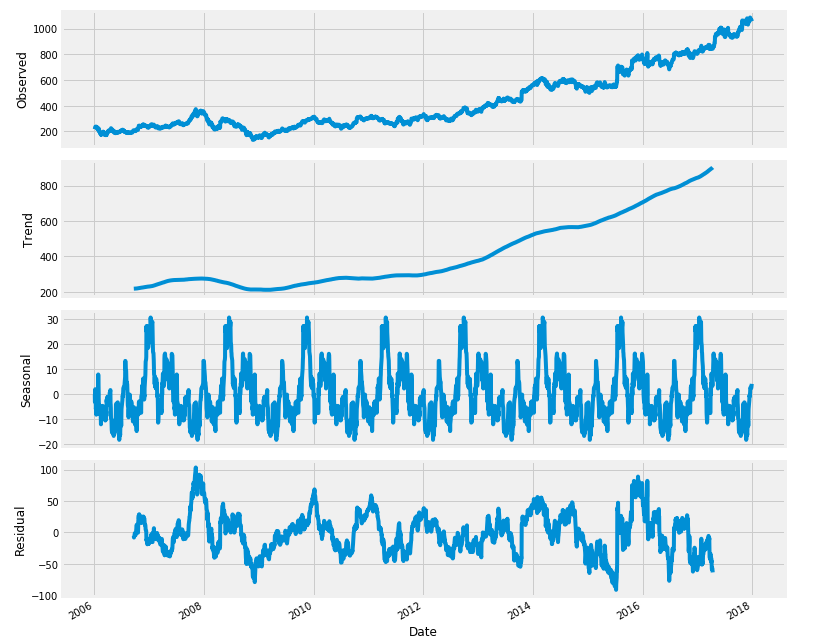


let's explore the decomposition of the time series for *Kansas

In [ ]:
start_date ='2013-09-11'
end_date = '2013-10-18'
filtered_data = city_df.loc[start_date:end_date]
kanzas_city = filtered_data['Kansas']
time_filtered = kanzas_city.loc[start_date:end_date]
plt.figure(figsize=(20,6))
decompotion = seasonal_decompose(time_filtered,model='additive',period=42)
decompotion.plot()
plt.xticks(rotation=90)
plt.show()

# <a id='2.2'>2.2 Autocorrelation and Partial Autocorrelation</a>

Autocorrelation - The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.
Partial Autocorrelation - The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.

In [ ]:
# Autocorrelation of humidity of San Diego
plot_acf(humidity["San Diego"],lags=25,title="San Diego")
plt.show()

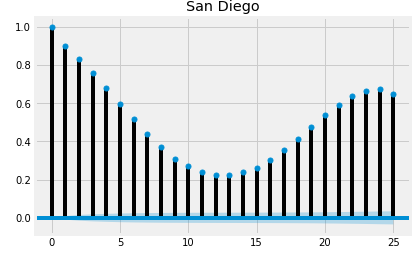

*Auto and part correlation

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(humidity["San Diego"], lags=50, ax=ax1)
ax1.set_title('(ACF)')
plot_pacf(humidity["San Diego"], lags=50, ax=ax2)
ax2.set_title('(PACF)')
plt.tight_layout()  
plt.show()

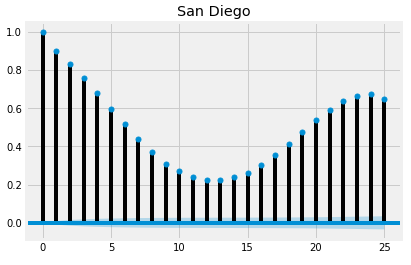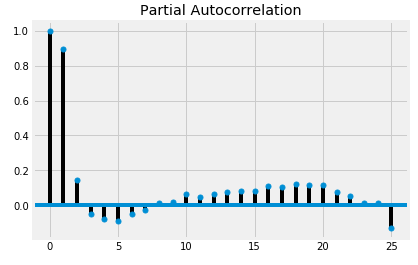

# <a id='3'>3.Modelling using statstools</a>

Prepare data *

you can switch, value iloc and loc

In [ ]:
data = city_df
train_data = data.iloc[:-30]
test_data = data.iloc[-30:]

Or you can limit it by a specific datelstm*.

In [ ]:
start_date = '2020-05-01'
filtered_data = city_df[start_date:]

ARIMA

In [ ]:
# Forecasting and predicting microsoft stocks volume
model = ARMA(microsoft["Volume"].diff().iloc[1:].values, order=(3,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=1000, end=1100)
plt.show()

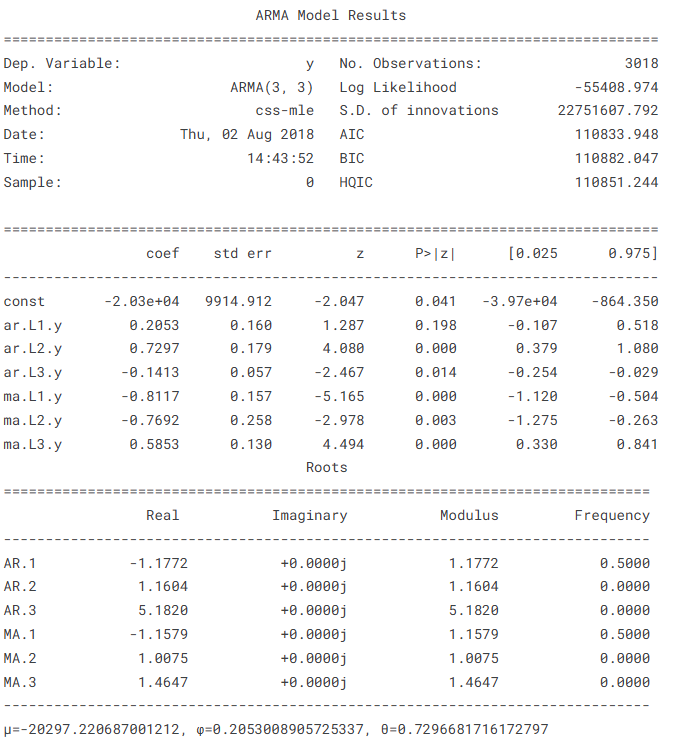

stationarity*

In [ ]:
ocruzn_date = city_df['Kansas']
result = adfuller(ocruzn_date)
print(result[0])

In [ ]:
def test_stationarity(timeseries_city):
    result = adfuller(timeseries_city)

    return {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Values': result[4]
    }

def check_all_columns(df):
    stationary_count = 0
    nonstationary_count = 0
    nonstationary_columns = []

    for col in df.columns:
        result = test_stationarity(df[col])
        if result['p-value'] <= 0.05:
            stationary_count += 1
        else:
            nonstationary_count += 1
            nonstationary_columns.append(col) 

    total_cols = len(df.columns)
    stationary_percentage = round(stationary_count / total_cols * 100, 2)
    nonstationary_percentage = round(nonstationary_count / total_cols * 100, 2)

    sum = f"""
    {total_cols}
    {stationary_count} ({stationary_percentage}%)
     {nonstationary_count} ({nonstationary_percentage}%)
    {nonstationary_columns}
    """

    return sum

sum = check_all_columns(city_df)
print(sum)

An autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity. ARIMA model is of the form: ARIMA(p,d,q): p is AR parameter, d is differential parameter, q is MA parameter

In [ ]:
# Predicting the microsoft stocks volume
rcParams['figure.figsize'] = 16, 6
model = ARIMA(microsoft["Volume"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=1000)
plt.show()

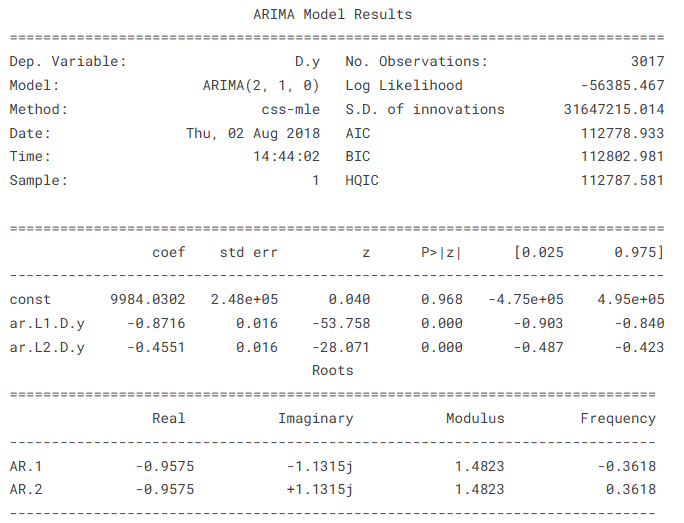

In [ ]:
for col in columns:
    mean_value = city_df[col].replace(1, np.nan).mean()  
    city_df[col] = city_df[col].replace(1, mean_value)

*nonstationary.Vector autoregression (VAR) is a stochastic process model used to capture the linear interdependencies among multiple time series. VAR models generalize the univariate autoregressive model (AR model) by allowing for more than one evolving variable. All variables in a VAR enter the model in the same way: each variable has an equation explaining its evolution based on its own lagged values, the lagged values of the other model variables, and colums=array an error term. VAR modeling does not require as much knowledge about the forces influencing a variable as do structural models with simultaneous equations: The only prior knowledge required is a list of variables which can be hypothesized to affect each other intertemporally.

In [ ]:
# Predicting closing price of Google and microsoft
train_sample = pd.concat([google["Close"].diff().iloc[1:],microsoft["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_sample,order=(2,1),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

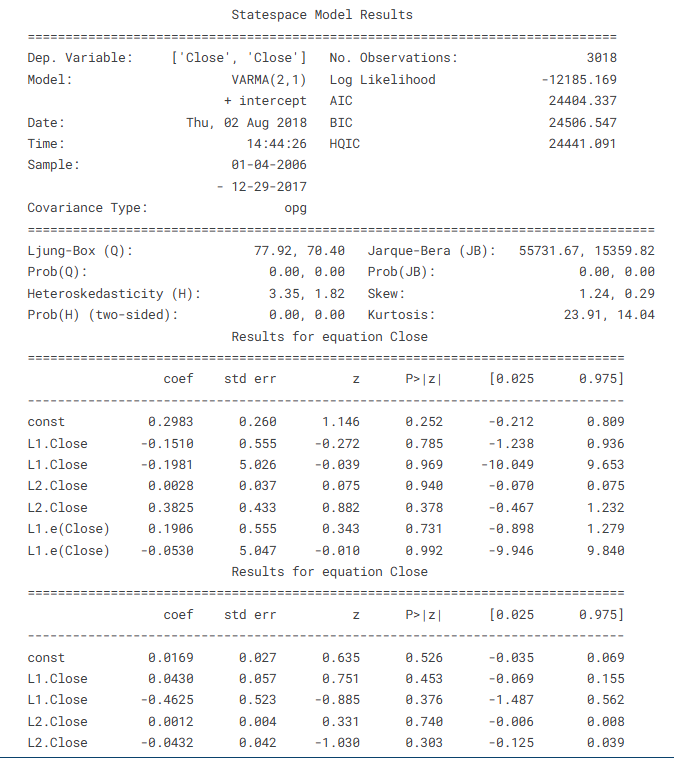

Or you can user VAR-model*

In [ ]:
last_date = data.index[-1]
import joblib
from statsmodels.tsa.api import VAR
model_var = VAR(train_data)
results = model_var.fit(maxlags=17, ic='aic')
var_model = f'var_model{last_date}.joblib'
joblib.dump(results, var_model)

In [ ]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Google Closing prices')
plt.show()

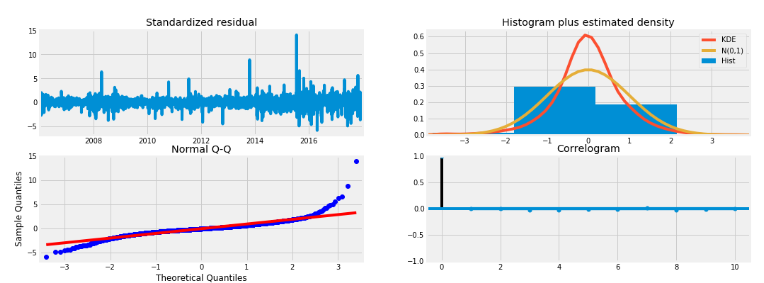

Metrics*

joblib.load

In [ ]:
#you can use load model out dump
forecast_var_loaded = loaded_model.forecast(train_data.values, steps=7)

mae_var = mean_absolute_error(test_data, forecast_var_loaded)
rmse_var = root_mean_squared_error(test_data, forecast_var_loaded)
mape_var = np.mean(np.abs((test_data - forecast_var_loaded) / test_data)) * 100
print(f"mae: {mae_var}")
print(f"rmese: {rmse_var}")
print(f"mape: {mape_var}")

Forecast*

In [ ]:
start_date = pd.to_datetime(start_date)
forecast_days = 10
forecast_var_loaded = loaded_model.forecast(train_data.values, steps=forecast_days * 168) 
forecast_dates_loaded = pd.date_range(
    start=start_date, 
    periods=forecast_days * 168,  
    freq='H'  
)
forecast_df = pd.DataFrame(forecast_var_loaded, index=forecast_dates_loaded, columns=train_data.columns)

In [ ]:

train_data_filtered = city_df[start_date:]  
single_station_forecast = forecast_df[['Kansas']]      
plt.figure(figsize=(30, 6))
plt.plot(train_data_filtered.index, train_data_filtered['Kansas'], 
             label='data', color='green')
plt.plot(single_station_forecast.index, single_station_forecast['Kansas'], 
             label='forecast', color='yellow', linestyle='+')
plt.title('Humidiy Kansas')
plt.xlabel('data')
plt.ylabel('humidity')
plt.legend()
plt.grid(True)
min_date = min(train_data_filtered.index.min(), single_station_forecast.index.min())  
max_date = max(train_data.index.max(), single_station_forecast.index.max())           
plt.xlim(min_date, max_date)  
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  
plt.xticks(rotation=90)  
plt.show()

SARIMA models

SARIMA models are useful for modeling seasonal time series, in which the mean and other statistics for a given season are not stationary across the years. The SARIMA model defined constitutes a straightforward extension of the nonseasonal autoregressive-moving average (ARMA) and autoregressive integrated moving average (ARIMA) models presented

In [ ]:
# Predicting closing price of Google'
train_sample = google["Close"].diff().iloc[1:].values
model = sm.tsa.SARIMAX(train_sample,order=(4,0,4),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

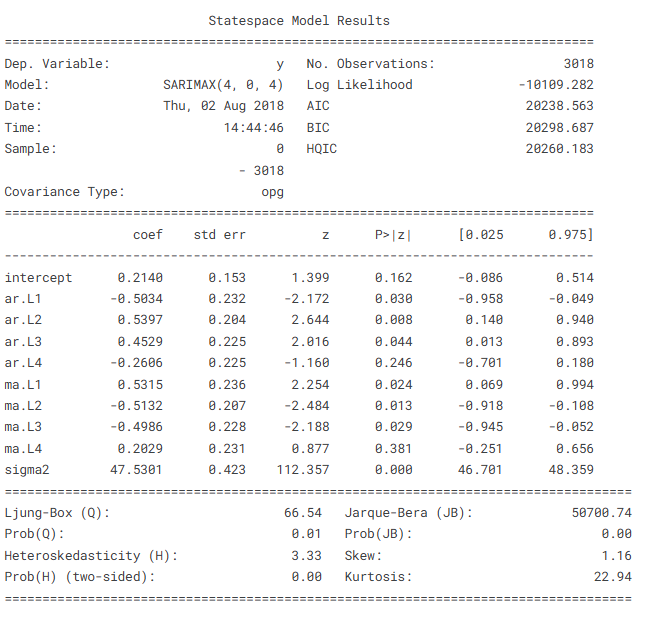

Develop LSTM Models for Time Series Forecasting*

1. Data Preparation

In [ ]:
# univariate data preparation
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

2. Vanilla LSTM


A Vanilla LSTM is an LSTM model that has a single hidden layer of LSTM units, and an output layer used to make a prediction.

We can define a Vanilla LSTM for univariate time series forecasting as follows.

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[102.06099]]

3. Stacked LSTM


Multiple hidden LSTM layers can be stacked one on top of another in what is referred to as a Stacked LSTM model.

An LSTM layer requires a three-dimensional input and LSTMs by default will produce a two-dimensional output as an interpretation from the end of the sequence.

We can address this by having the LSTM output a value for each time step in the input data by setting the return_sequences=True argument on the layer. This allows us to have 3D output from hidden LSTM layer as input to the next.

In [ ]:
# univariate stacked lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

4. Original-vanila LSTM*

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
import pandas as pd

y = filtered_data.values

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, :])
    return np.array(X), np.array(y)

time_step = 168  
X, y = create_dataset(y, time_step)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 176)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(176)) 
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=20, batch_size=32)

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

model = load_model('lstm_metro_model.h5')

forecast_horizon = 7 * 24

time_step = 1768 
if len(y) < time_step:
    raise ValueError(f"length ({len(y)}) time_stamp ({time_step}).")

last_sequence = y[-time_step:]

if last_sequence.shape != (time_step, 540):
    raise ValueError(f"shape last_sequence ({last_sequence.shape}) error({time_step}, 540).")

input_sequence = last_sequence.reshape(1, time_step, 540)

predictions = []

for _ in range(forecast_horizon):

    next_step_prediction = model.predict(input_sequence)
    
    predictions.append(next_step_prediction[0])
    
    input_sequence = np.append(input_sequence[:, 1:, :], next_step_prediction.reshape(1, 1, 540), axis=1)

predictions = np.array(predictions)

predicted_data = pd.DataFrame(predictions, columns=filtered_data.columns)

print(predicted_data.head())

prediction

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_forecast(real_data, predicted_data):
    min_length = min(len(real_data), len(predicted_data))
    real_data = real_data[-min_length:]
    predicted_data = predicted_data[-min_length:]
    
    mae_scores = []
    mse_scores = []
    rmse_scores = []
    
    for station_index in range(real_data.shape[1]):  
        real_station = real_data[:, station_index]
        predicted_station = predicted_data[:, station_index]
        
        mae = mean_absolute_error(real_station, predicted_station)
        mae_scores.append(mae)
        
        mse = mean_squared_error(real_station, predicted_station)
        mse_scores.append(mse)
        
        rmse = np.sqrt(mse)
        rmse_scores.append(rmse)
    
    print(f"mae: {np.mean(mae_scores):.4f}")
    print(f"mse: {np.mean(mse_scores):.4f}")
    print(f"rmse: {np.mean(rmse_scores):.4f}")

evaluation_real_data = y[-forecast_horizon:]  
evaluation_predicted_data = predictions  

evaluate_forecast(evaluation_real_data, evaluation_predicted_data)

The ETS (Error, Trend, Seasonal) model is a highly effective and widely used approach for time series forecasting due to its ability to explicitly model the key components of time series data. Its suitability for time series analysis stems from several important characteristics:

Explicit Decomposition of Time Series Components:
The ETS model breaks down a time series into three fundamental components: Error, Trend, and Seasonality. This decomposition allows the model to capture and analyze the underlying structure of the data more effectively. By isolating these components, the model can better understand the patterns and relationships within the time series, leading to more accurate forecasts.

Flexibility in Modeling Trends and Seasonality:
One of the key strengths of the ETS model is its flexibility in handling different types of trends and seasonal patterns. For example:

Trend: The model can accommodate time series with no trend, an additive trend (where the trend increases or decreases linearly), or a multiplicative trend (where the trend grows or decays exponentially).

Seasonality: Similarly, the model can handle both additive and multiplicative seasonality, making it suitable for a wide range of time series data, from those with constant seasonal effects to those where seasonality grows or shrinks over time.

Adaptability to Various Time Series Characteristics:
The ETS framework is designed to adapt to the specific characteristics of the time series being analyzed. Whether the data exhibits a strong trend, clear seasonality, or irregular fluctuations, the ETS model can be configured to account for these features. This adaptability makes it a versatile tool for forecasting across different domains, such as finance, retail, energy, and more.

Handling Irregularities and Noise:
The "Error" component of the ETS model accounts for irregularities, noise, and unexpected fluctuations in the data. By explicitly modeling these errors, the ETS framework can produce more robust forecasts that are less sensitive to outliers or sudden changes in the time series.

Simplicity and Interpretability:
Unlike more complex models such as ARIMA or machine learning-based approaches, the ETS model is relatively simple and easy to interpret. Its clear separation of components allows analysts to understand and explain

ONE VARIATION ETS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

data = {
    'date': pd.date_range(start='2020-01-01', periods=36, freq='M'),
    'city': ['City_A'] * 36 + ['City_B'] * 36 + ['City_C'] * 36,
    'humidity': [
        # City_A
        60, 62, 65, 70, 68, 67, 65, 64, 63, 62, 61, 60,
        61, 63, 66, 71, 69, 68, 66, 65, 64, 63, 62, 61,
        62, 64, 67, 72, 70, 69, 67, 66, 65, 64, 63, 62,
        # City_B
        55, 57, 60, 65, 63, 62, 60, 59, 58, 57, 56, 55,
        56, 58, 61, 66, 64, 63, 61, 60, 59, 58, 57, 56,
        57, 59, 62, 67, 65, 64, 62, 61, 60, 59, 58, 57,
        # City_C
        50, 52, 55, 60, 58, 57, 55, 54, 53, 52, 51, 50,
        51, 53, 56, 61, 59, 58, 56, 55, 54, 53, 52, 51,
        52, 54, 57, 62, 60, 59, 57, 56, 55, 54, 53, 52
    ]
}
df = pd.DataFrame(data)

city_data = df[df['city'] == 'City_A'].set_index('date')

plt.figure(figsize=(10, 6))
plt.plot(city_data.index, city_data['humidity'], label='humidity в City_A')
plt.title('humiditi in city_A')
plt.xlabel('data')
plt.ylabel('humidity (%)')
plt.legend()
plt.show()

model = ExponentialSmoothing(city_data['humidity'], trend='add', seasonal='add', seasonal_periods=12)
ets_model = model.fit()
print(ets_model.summary())

forecast model

In [ ]:
forecast_periods = 12
forecast = ets_model.forecast(steps=forecast_periods)

plt.figure(figsize=(10, 6))
plt.plot(city_data.index, city_data['humidity'], label='real_data')
plt.plot(pd.date_range(start=city_data.index[-1], periods=forecast_periods+1, freq='M')[1:], forecast, label='forecast', color='red')
plt.title('forecast City_A')
plt.xlabel('data')
plt.ylabel('humidty (%)')
plt.legend()
plt.show()

print("forecasting humidity")
print(forecast)

metrics for ets model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

train_size = int(len(city_data) * 0.8)
train, test = city_data.iloc[:train_size], city_data.iloc[train_size:]

model_train = ExponentialSmoothing(train['humidity'], trend='add', seasonal='add', seasonal_periods=12)
ets_model_train = model_train.fit()

forecast_test = ets_model_train.forecast(steps=len(test))

mae = mean_absolute_error(test['humidity'], forecast_test)
mse = mean_squared_error(test['humidity'], forecast_test)
rmse = np.sqrt(mse)

print(f"(MAE): {mae:.2f}")
print(f"(MSE): {mse:.2f}")
print(f"(RMSE): {rmse:.2f}")

# Визуализация результатов на тестовой выборке
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['humidity'], label='train')
plt.plot(test.index, test['humidity'], label='test', color='orange')
plt.plot(test.index, forecast_test, label='forecast', color='red')
plt.title('ETS Model')
plt.xlabel('data')
plt.ylabel('humidity (%)')
plt.legend()
plt.show()

Second varitation model ets using cycle for

In [ ]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


train_size = int(len(city_df) * 0.8) 
train_data = city_df.iloc[:train_size]
test_data = city_df.iloc[train_size:]
period = len(test_data)  

forecasts = {}
mae_scores = {}
rmse_scores = {}
mape_scores = {}
r2_scores = {}

for city in city_df.columns:
    model = ExponentialSmoothing(train_data[city], trend='add', seasonal='add', seasonal_periods=42)
    model_fit = model.fit()
    
    forecast = model_fit.forecast(period)
    forecast[forecast < 0] = 0  
    forecasts[city] = forecast

    y_true = test_data[city]
    y_pred = forecast

    mae_scores[city] = mean_absolute_error(y_true, y_pred)
    rmse_scores[city] = np.sqrt(mean_squared_error(y_true, y_pred))
    mape_scores[city] = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # 
    r2_scores[city] = r2_score(y_true, y_pred)

avg_mae = np.mean(list(mae_scores.values()))
avg_rmse = np.mean(list(rmse_scores.values()))
avg_mape = np.mean(list(mape_scores.values()))
avg_r2 = np.mean(list(r2_scores.values()))

print("avg MAE:", avg_mae)
print("avg RMSE:", avg_rmse)
print("avg MAPE:", avg_mape)
print("avg R²:", avg_r2)